In [ ]:
!pip install stanza -q

In [ ]:
import stanza
import random
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import naive_bayes as NB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
random.seed(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open("/content/drive/MyDrive/Corpus.txt") as f:
    review = f.readlines()

In [ ]:
print(review[0])

Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.



In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: sentiment
INFO:stanza:Done loading processors!


In [ ]:
def sentence_sampler(rev,size):
    rev = rev.copy()
    count = 0
    txt = []
    sent = []
    while(count<size):
        text = random.sample(rev,1)[0]
        doc = nlp(text)
        for i, sentence in enumerate(doc.sentences):
            if ((sentence.sentiment == 2) or (sentence.sentiment ==0)) and count<size:
                txt.append(sentence.text)
                sent.append(sentence.sentiment)
                count+=1
        rev.remove(text)
    return txt,sent,rev

We have to sample for the training and test set from the corpus (only the positive and negative labels, which are 2 and 0). To do so, we pick up sentences from corpus randomly and check if the label is 0 or 2, if so, we consider it. We have 500 sentences for training and 250 for testing.

In [ ]:
sentences = random.sample(review,1500)
sent_samp,sent,sentences = sentence_sampler(sentences,750)

In [ ]:
dataframe = pd.DataFrame(list(zip(sent_samp, sent)),
                         columns =['Text', 'Sentiment'])

In [ ]:
dataframe.head()

,Text,Sentiment
0,Really impressed!,2
1,Got it to day and makes the phone feel light w...,2
2,Impressive and worth the money.,2
3,Phone died after 2 days.,0
4,"I can however, understand how it passed inspec...",0


In [ ]:
train, test, train_y, test_y = train_test_split(dataframe['Text'],dataframe['Sentiment'],random_state=42,test_size=0.333)

In [ ]:
vec = CountVectorizer(stop_words='english')
train = vec.fit_transform(train).toarray()
test = vec.transform(test).toarray()

In [ ]:
model = NB.MultinomialNB()
model.fit(train, train_y)
model.score(test, test_y)

0.752

A larger training set ensures the model works good on unseen data. Since we are training the model on only 500 sentences of positive and negative sentiment, it is not enough for the model to generalise well, which explains the accuracy of this trained model. To get better accuracy, we can train the model on more sentences.

In [ ]:
y_pred = model.predict(test)

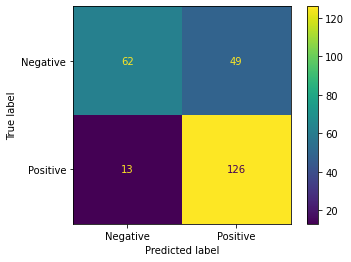

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_y, y_pred), display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

Recurrent Neural Network (RNN) seems a good model for sentiment analysis. RNN uses the past information alongwith the current input to produce output. Because of its sequential nature, the context isn't lost and hence performs good in sentiment analysis. Long-Short Term Memory (LSTM), being an extension of RNN, keeps only those past information which is important, making it efficient and faster.

In order to make probabilistic outputs, it’s always good to use ‘softmax’ as activation function in the final layer (it returns values lying between 0 and 1). Unlike sigmoid, softmax can be used for multiclassification problems as well.

We have ignored the sentences of neutral sentiment and made sure the sentences chosen for training the model are either of positive or negative sentiment. The sampling among these 2 categories has been done randomly to ensure generalisation of model. 
We can also include the neutral sentiment sentences in our training set to extend model prediction to neutral sentiment as well. This can be done directly using the sample() function on the corpus and writing the number of samples we want.

In [ ]:
precision_score(test_y, y_pred, pos_label=0)

0.8266666666666667

In [ ]:
precision_score(test_y, y_pred, pos_label=2)

0.72

Precision gives the percentage of true positives (predicted positives that are actually positive) in the total predicted positives. Precision for label 0 (negative sentiment) is 82% while for label 2 (positive sentiment) is 72%.

In [ ]:
recall_score(test_y, y_pred, pos_label=0)

0.5585585585585585

In [ ]:
recall_score(test_y, y_pred, pos_label=2)

0.9064748201438849

Recall gives the percentage of true positives in actual positives. Recall for label 0 (negative sentiment) is 55% while for label 2 (positive sentiment) is 90%.

Clearly, precision for label 0 is high, while recall is low. Similarly, for label 2, precision is low where as recall is high. 

In [ ]:
f1_score(test_y, y_pred, pos_label=0)

0.6666666666666666

In [ ]:
f1_score(test_y, y_pred, pos_label=2)

0.802547770700637

Our aim is to have a high precision as well as a good recall. Since, increasing one leads to decrease of the other measure, we have to trade-off. To make sure we have some decent value of both precision and recall, we have another measure, **F-score** that is the harmonic mean of precision and recall. 
The F1 score of label 0 is 66% while for label 2, it is 80%